**Estadística Aplicada**

**Edwin Javier Hernández Rodríguez**

**Sesion XX- 2 Mayo 2023**

## Pronóstico del IGAE (base 2013)

In [1]:
#librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

# las librerias de series de tiempo:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima.model import ARIMA

In [4]:
#LA BASE DE DATOS
igae = pd.read_excel('IGAE.xlsx')
igae.head()

,Periodos,IGAE
0,2000/01,79.325572
1,2000/02,78.799329
2,2000/03,78.714380
3,2000/04,79.247601
4,2000/05,79.795178


In [5]:
igae['Periodos'] = pd.to_datetime(igae['Periodos'], format= '%Y/%m') #es y minuscula cuando el año viene a dos digitos

In [6]:
igae.head()

,Periodos,IGAE
0,2000-01-01,79.325572
1,2000-02-01,78.799329
2,2000-03-01,78.714380
3,2000-04-01,79.247601
4,2000-05-01,79.795178


In [9]:
## definir la frecuencia y vamos a convertir la fecha en el index
igae = igae.set_index('Periodos')
igae.head()

,IGAE
Periodos,
2000-01-01,79.325572
2000-02-01,78.799329
2000-03-01,78.714380
2000-04-01,79.247601
2000-05-01,79.795178


In [12]:
igae = igae.asfreq('MS')

In [13]:
igae.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01'],
              dtype='datetime64[ns]', name='Periodos', length=278, freq='MS')

para poder emplear tecnicas de series de tiempo se tiene que dar formato y frecuencia de tiempo al index

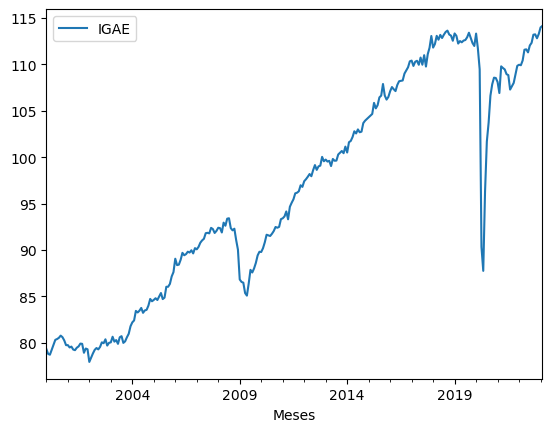

In [15]:
# 1.- Graficar
igae.plot()
plt.xlabel('Meses')
plt.show()

No parece un proceso estacionario, y se comporta como una caminata aleatoria con deriva positiva

In [17]:
# 2.- Verificar si este es un proceso estacionario
# hacemos la prueba de dickey-fuller (raíz unitaria)
ADF_test = adfuller(igae['IGAE'])
#H0: la serie es NO ESTACIONARIA

#Significancia 0.05
alpha = 0.05
if ADF_test[1] < alpha:
    print('Se rechaza H0, la serie es estacionaria')
else:
    print('No se rechaza H0, la serie es NO estacionaria')

No se rechaza H0, la serie es NO estacionaria


Como la serie es NO estacionaria, tenemos que volvera estacionaria (aplicar primeras diferencias)

$\Delta Y_{t} = Y_t - Y_{t-1} $

In [19]:
#aplicando primeras diferencias a la serie IGAE
igae['igae_diferenciado1'] = igae['IGAE'].diff()


In [20]:
igae.head()

,IGAE,igae_diferenciado1
Periodos,,
2000-01-01,79.325572,NaN
2000-02-01,78.799329,-0.526243
2000-03-01,78.714380,-0.084950
2000-04-01,79.247601,0.533221
2000-05-01,79.795178,0.547577


In [24]:
 #Verificar si este es un proceso estacionario
# hacemos la prueba de dickey-fuller (raíz unitaria)
ADF_test1 = adfuller(igae['igae_diferenciado1'].dropna())
#H0: la serie es NO ESTACIONARIA

#Significancia 0.05
alpha = 0.05
if ADF_test1[1] < alpha:
    print('Se rechaza H0, la serie es estacionaria')
else:
    print('No se rechaza H0, la serie es NO estacionaria')

Se rechaza H0, la serie es estacionaria


El IGAE diferenciado una vez, es un proceso estacionario

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


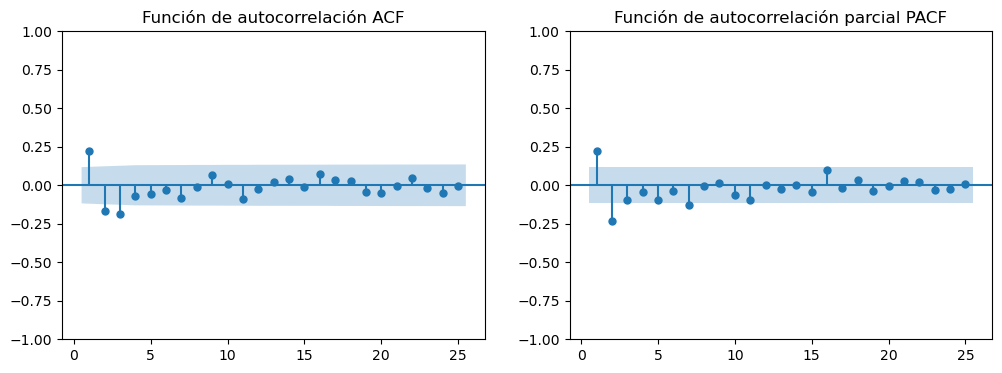

In [25]:
##identificar que tipo de proceso estacionario es
fig, ax =plt.subplots(1,2, figsize =(12,4))
## subgrafica 0
plot_acf(igae['igae_diferenciado1'].dropna(), zero=False, ax=ax[0], title= 'Función de autocorrelación ACF')
ax[0].set_ylim(-1,1)
## subgrafica 1
plot_pacf(igae['igae_diferenciado1'].dropna(), zero=False, ax=ax[1], title= 'Función de autocorrelación parcial PACF')
ax[1].set_ylim(-1,1)
plt.show()

Un modelo ARIMA (p,I,q)
- p= es la parte AR(p) 
- I= orden de integracion, cuantas veces se diferencio la serie para hacerla estacionaria
- q= es la parte MA(q) 

In [30]:
#suponer que estamos ante un AR(2)
modelo = ARIMA(igae['igae_diferenciado1'].dropna(), order=(2,1,0))
resultado = modelo.fit()
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:     igae_diferenciado1   No. Observations:                  277
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -534.653
Date:                Tue, 02 May 2023   AIC                           1075.306
Time:                        17:12:32   BIC                           1086.168
Sample:                    02-01-2000   HQIC                          1079.665
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3255      0.012    -27.577      0.000      -0.349      -0.302
ar.L2         -0.3212      0.015    -22.121      0.000      -0.350      -0.293
sigma2         2.8163      0.043     65.016      0.0

Este es un AR(2) $Y_t = -0.32 Y_{t-1} - 0.32 Y_{t-2} + \varepsilon_t $

$\varepsilon normales(0, \sigma^2_{\varepsilon} = 2.81) $

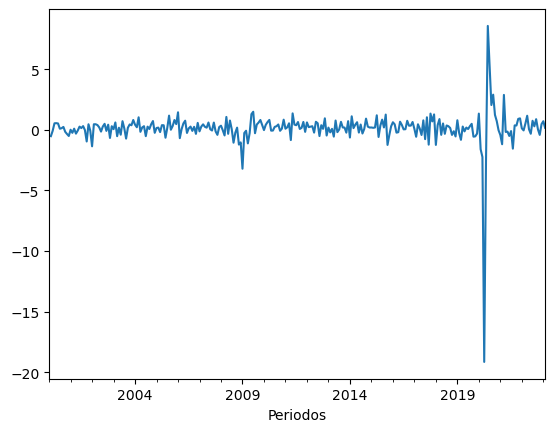

In [33]:
igae['igae_diferenciado1'].plot()
plt.show()

- AIC criterio de Akaike
- BIC Criterio de Bayesiano de Informacion
- AIC, BIC, HQIC son medidas de bondad de ajuste para comparar modelos "similares"
- El mejor modelo o el modelo "real" es el que tiene el menor valor del criterio de Akaike (AIC)

In [40]:
#Vamos a estimar varios modelos y que se guarde el AIC BIC

ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(igae['igae_diferenciado1'].dropna(), order=(ar,1,ma))
        resultado = modelo.fit()
        ic[(ar,ma)] = [resultado.aic, resultado.bic]
        
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 4


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 5


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 6


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 0
AR: 1, MA: 1


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 5


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 6


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 4


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 5


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 6


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 4


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 5


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 6


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2
AR: 4, MA: 3


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 4


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 5


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 6


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2
AR: 5, MA: 3


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 4


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 5


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 6


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 3
AR: 6, MA: 4


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 5


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 6


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
ic

AIC          BIC
AR MA                          
0  0   1118.837789  1122.458190
   1   1004.998544  1012.239345
   2    985.963567   996.824769
   3    986.037371  1000.518974
   4    976.999088   995.101093
   5    977.683332   999.405737
   6    977.307035  1002.649841
1  0   1103.568042  1110.808844
   1    992.424413  1003.285615
   2    987.216401  1001.698004
   3    988.354607  1006.456611
   4    975.908803   997.631209
   5    980.479533  1005.822339
   6    979.606935  1008.570142
2  0   1075.306385  1086.167588
   1    979.727972   994.209576
   2    975.786335   993.888340
   3    987.161030  1008.883435
   4    979.849275  1005.192081
   5    990.734272  1019.697479
   6    978.872930  1011.456538
3  0   1053.545410  1068.027013
   1    979.293863   997.395868
   2    980.956786  1002.679191
   3    979.781817  1005.124623
   4    978.384603  1007.347810
   5    980.417562  1013.001170
   6    989.178859  1025.382867
4  0   1046.031856  1064.133861
   1    980.871233  1002.593638
   2    982.185524  1007.528330
   3    986.027949  1014.991156
   4    981.791965  1014.375572
   5    981.468108  1017.672116
   6    984.084521  1023.908931
5  0   1035.994766  1057.717171
   1    980.491824  1005.834630
   2    982.420517  1011.383724
   3    981.358583  1013.942191
   4    984.019967  1020.223976
   5    986.657387  1026.481797
   6    987.002789  1030.447600
6  0   1034.850760  1060.193566
   1    982.148162  1011.111368
   2    983.658431  1016.242039
   3    986.822872  1023.026880
   4    985.879799  1025.704208
   5    986.105155  1029.549965
   6    987.917441  1034.982652

In [42]:
#ordenar los modelos segun su AIC de menor a mayor
ic.sort_values('AIC', ascending=True)[0:5]

AIC          BIC
AR MA                         
2  2   975.786335   993.888340
1  4   975.908803   997.631209
0  4   976.999088   995.101093
   6   977.307035  1002.649841
   5   977.683332   999.405737

Según el AIC el mejor modelo es un ARMA (2,2)

In [43]:
## el modelo a estimar de el igae diferenciado es un ARIMA(2,1,2)
modelo = ARIMA(igae['igae_diferenciado1'], order=(2,1,2))
resultado = modelo.fit()
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:     igae_diferenciado1   No. Observations:                  278
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -490.720
Date:                Tue, 02 May 2023   AIC                            991.440
Time:                        17:38:42   BIC                           1009.560
Sample:                    01-01-2000   HQIC                           998.710
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9509      0.129      7.397      0.000       0.699       1.203
ar.L2         -0.3434      0.092     -3.751      0.000      -0.523      -0.164
ma.L1         -1.7396      1.348     -1.290      0.1

Una vez que hemos elegido el modelo, se debe pronosticar, vamos a pronosticar el IGAE diferenciado

In [45]:
resultado.predict('2023-03-01', '2023-10-01')

2023-03-01   -0.035869
2023-04-01   -0.041197
2023-05-01    0.021923
2023-06-01    0.083775
2023-07-01    0.120920
2023-08-01    0.135005
2023-09-01    0.135645
2023-10-01    0.131418
Freq: MS, Name: predicted_mean, dtype: float64

In [47]:
##pronosticar el IGAE, ¿cuantas veces se diferencio para hacerlo estacionario? una vez

modelo2 = ARIMA(igae['IGAE'], order=(2,1,2))
resultado2 = modelo2.fit()

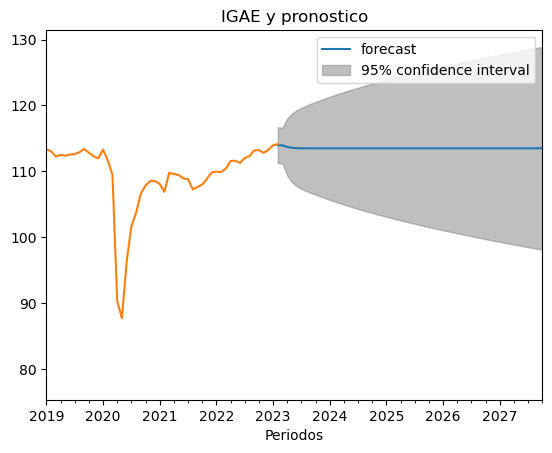

In [54]:
from statsmodels.graphics.tsaplots import plot_predict

# codigo
plot_predict(resultado2, start = '2023-02-01', end='2027-10-01')
igae['IGAE'].plot()
plt.title('IGAE y pronostico')
plt.xlim('2019-01', '2027-10')
plt.show()

El pronostico  de modelos ARIMA es bastante preciso a corto plazo (1-3 periodos) pero a muy largo plazo es bastante impreciso (mas de 3 periodos)

In [55]:
resultado2.predict('2023-02-01', '2023-10-01')

2023-02-01    113.980595
2023-03-01    113.940583
2023-04-01    113.718561
2023-05-01    113.584648
2023-06-01    113.525095
2023-07-01    113.506177
2023-08-01    113.503829
2023-09-01    113.506017
2023-10-01    113.508275
Freq: MS, Name: predicted_mean, dtype: float64